In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


In [2]:
nci_data = pd.read_csv("nci60_data.csv", index_col=0)

X = scale(nci_data.T)
P = PCA().fit_transform(X)

PC1 = P[:,0]
PC2 = P[:,1]


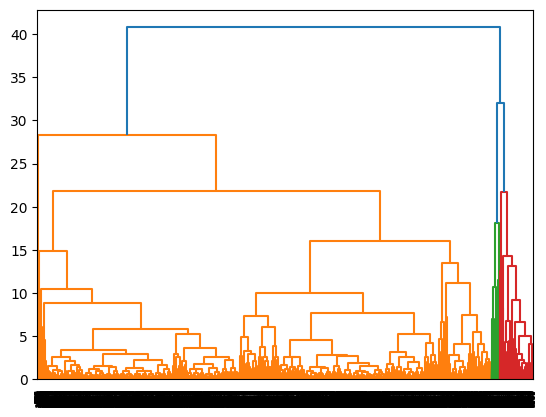

In [3]:
data = list(zip(PC1, PC2))

linkage_data = linkage(data, method='complete', metric='euclidean')
dendrogram(linkage_data)

plt.show()

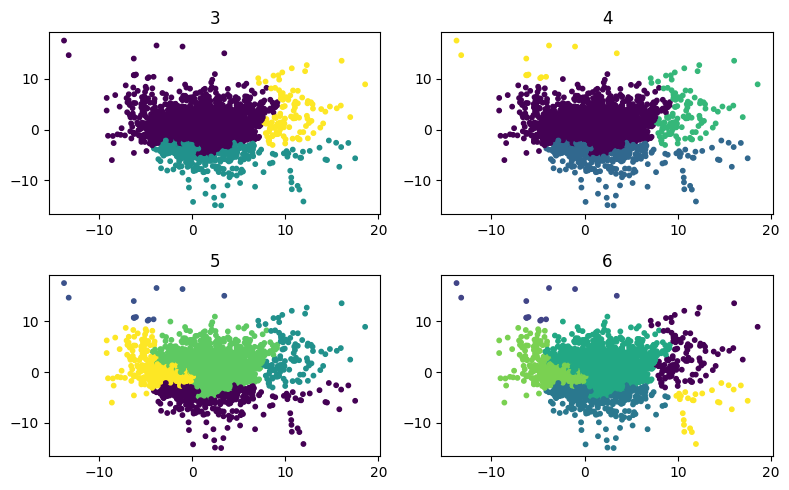

In [4]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))  # 2 rows, 2 columns

# Plot the first graph
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(data)

axes[0, 0].scatter(PC1, PC2, c=labels, s=10)
axes[0, 0].set_title('3')

# Plot the second graph
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(data)

axes[0, 1].scatter(PC1, PC2, c=labels, s=10)
axes[0, 1].set_title('4')

# Plot the third graph
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(data)

axes[1, 0].scatter(PC1, PC2, c=labels, s=10)
axes[1, 0].set_title('5')

# Plot the fourth graph
hierarchical_cluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(data)

axes[1, 1].scatter(PC1, PC2, c=labels, s=10)
axes[1, 1].set_title('6')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [5]:
corr = nci_data.corr(method='spearman') # or .corr() for pearson
corr_dist = 1 - corr #np.abs(corr)

<ipython-input-8-af20dcd34a22>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(corr_dist, method='complete')


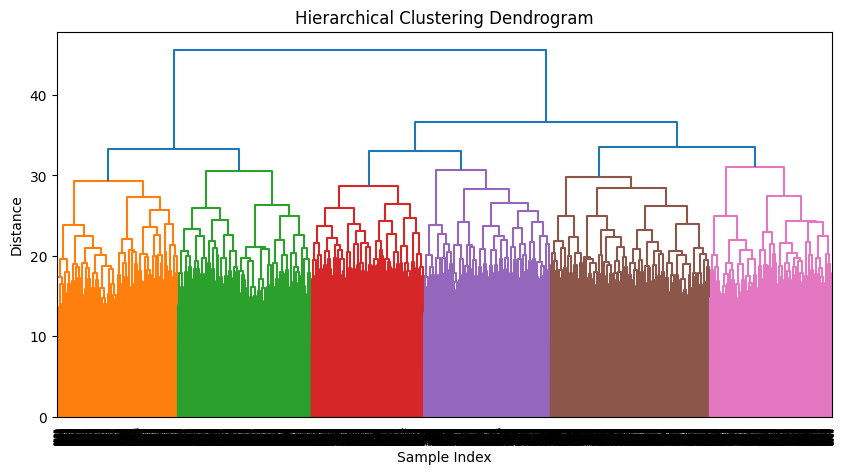

In [8]:
# Perform hierarchical clustering
Z = linkage(corr_dist, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

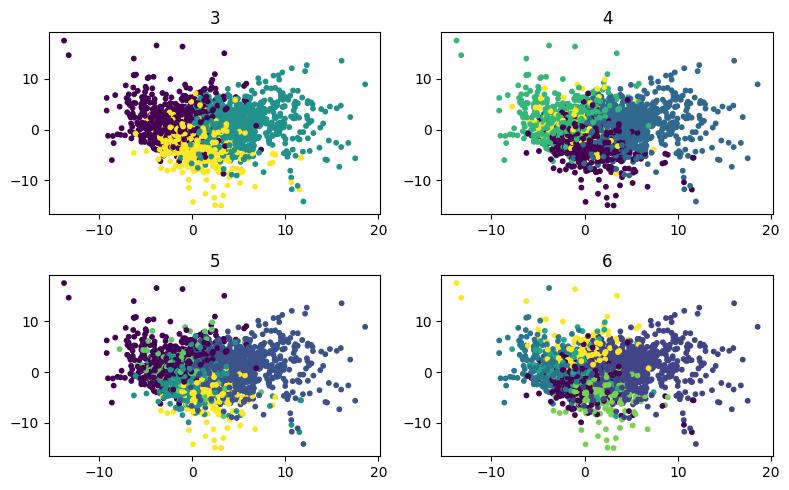

In [7]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))  # 2 rows, 2 columns

# Plot the first graph
hierarchical_cluster_corr = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
labels = hierarchical_cluster_corr.fit_predict(corr_dist)

axes[0, 0].scatter(PC1, PC2, c=labels, s=10)
axes[0, 0].set_title('3')

# Plot the second graph
hierarchical_cluster_corr = AgglomerativeClustering(n_clusters=4, metric='precomputed', linkage='complete')
labels = hierarchical_cluster_corr.fit_predict(corr_dist)

axes[0, 1].scatter(PC1, PC2, c=labels, s=10)
axes[0, 1].set_title('4')

# Plot the third graph
hierarchical_cluster_corr = AgglomerativeClustering(n_clusters=5, metric='precomputed', linkage='complete')
labels = hierarchical_cluster_corr.fit_predict(corr_dist)

axes[1, 0].scatter(PC1, PC2, c=labels, s=10)
axes[1, 0].set_title('5')

# Plot the fourth graph
hierarchical_cluster_corr = AgglomerativeClustering(n_clusters=6, metric='precomputed', linkage='complete')
labels = hierarchical_cluster_corr.fit_predict(corr_dist)

axes[1, 1].scatter(PC1, PC2, c=labels, s=10)
axes[1, 1].set_title('6')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


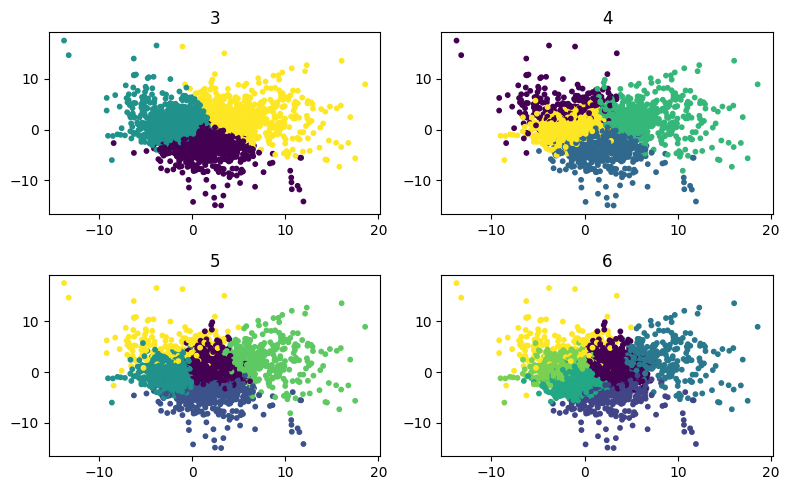

In [13]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))  # 2 rows, 2 columns

# Plot the first graph
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(P)
labels = kmeans.predict(P)

axes[0, 0].scatter(PC1, PC2, c=labels, s=10)
axes[0, 0].set_title('3')

# Plot the second graph
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(P)
labels = kmeans.predict(P)

axes[0, 1].scatter(PC1, PC2, c=labels, s=10)
axes[0, 1].set_title('4')

# Plot the third graph
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(P)
labels = kmeans.predict(P)

axes[1, 0].scatter(PC1, PC2, c=labels, s=10)
axes[1, 0].set_title('5')

# Plot the fourth graph
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(P)
labels = kmeans.predict(P)

axes[1, 1].scatter(PC1, PC2, c=labels, s=10)
axes[1, 1].set_title('6')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()